# 初始化

In [0]:
#@markdown - **挂载** 
from google.colab import drive
drive.mount('GoogleDrive')

In [0]:
#@markdown - **卸载**
!fusermount -u GoogleDrive

# 代码区

In [0]:
#@title 线性回归 { display-mode: "both" }
# linear regression
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
 
learning_rate = 3e-2 #@param {type:"number"}
num = 32 #@param {type: "integer"}
num_epoch = 50 #@param {type: "integer"}

In [2]:
#@markdown - **定义网络结构**
graph = tf.Graph()
with graph.as_default():
    with tf.name_scope('Input'):
        x_input = tf.placeholder(tf.float32, shape=[None,], name='x_input')
        y_input = tf.placeholder(tf.float32, shape=[None,], name='y_input')
#     with tf.name_scope('w_and_b'):
    with tf.variable_scope('w_and_b'):
        w = tf.Variable(2.0, name='weight')
        b = tf.Variable(1.0, name='biases')
        y = tf.add(tf.multiply(x_input, w), b)
    with tf.name_scope('Train'):
        loss_op = tf.reduce_mean(tf.pow(y_input - y, 2))
        var_l = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
        train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss_op, var_list=var_l)

        gradients_node = tf.gradients(loss_op, w)


Instructions for updating:
Colocations handled automatically by placer.


In [3]:
var_l

[<tf.Variable 'w_and_b/weight:0' shape=() dtype=float32_ref>,
 <tf.Variable 'w_and_b/biases:0' shape=() dtype=float32_ref>]

epoch: 1 	 loss: 2685.39 	 gradients: -5290.05
epoch: 2 	 loss: 2526.66 	 gradients: -5131.33
epoch: 3 	 loss: 2372.92 	 gradients: -4972.75
epoch: 4 	 loss: 2224.22 	 gradients: -4814.42
epoch: 5 	 loss: 2080.65 	 gradients: -4656.44
epoch: 6 	 loss: 1942.27 	 gradients: -4498.92
epoch: 7 	 loss: 1809.14 	 gradients: -4341.99
epoch: 8 	 loss: 1681.30 	 gradients: -4185.76
epoch: 9 	 loss: 1558.77 	 gradients: -4030.35
epoch: 10 	 loss: 1441.59 	 gradients: -3875.89
epoch: 11 	 loss: 1329.77 	 gradients: -3722.51
epoch: 12 	 loss: 1223.29 	 gradients: -3570.35
epoch: 13 	 loss: 1122.14 	 gradients: -3419.55
epoch: 14 	 loss: 1026.29 	 gradients: -3270.23
epoch: 15 	 loss: 935.70 	 gradients: -3122.55
epoch: 16 	 loss: 850.31 	 gradients: -2976.65
epoch: 17 	 loss: 770.05 	 gradients: -2832.67
epoch: 18 	 loss: 694.83 	 gradients: -2690.76
epoch: 19 	 loss: 624.56 	 gradients: -2551.06
epoch: 20 	 loss: 559.13 	 gradients: -2413.71
epoch: 21 	 loss: 498.41 	 gradients: -2278.87
epoch: 2

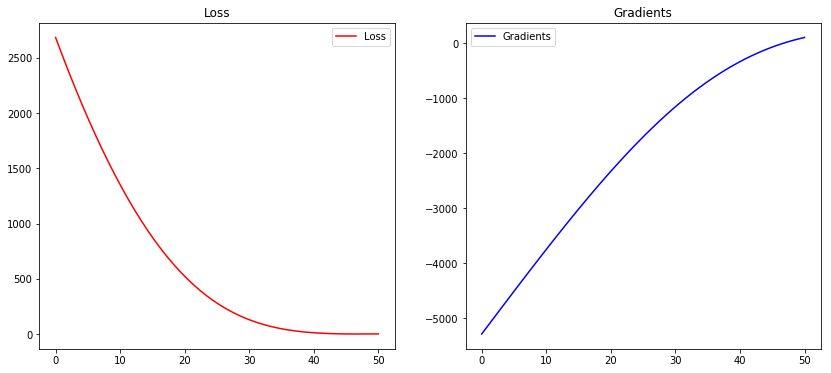

In [4]:
#@markdown - **训练网络**
with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
     
    '''构造数据集'''
    x_pure = np.random.randint(-10, 100, num)
    x_train = x_pure + np.random.randn(num) / 10  # 为x加噪声
    y_train = 3 * x_pure + 2 + np.random.randn(num) / 10  # 为y加噪声
    Gradients = []
    Loss = []
    for i in range(num_epoch):
        _, gradients, loss = sess.run([train_op, gradients_node, loss_op],
                                      feed_dict={x_input: x_train, y_input: y_train})
        print_list = [i+1, loss, gradients[0]]
        print("epoch: {0[0]} \t loss: {0[1]:.2f} \t gradients: {0[2]:.2f}".format(print_list))
        Gradients.append(gradients)
        Loss.append(loss)
    fig = plt.figure(1, (14, 6))
    AX = [fig.add_subplot(i) for i in range(121,123)]
    name = ['Loss', 'Gradients']
    color = ['r', 'b']
    #@markdown - **用于显示损失和梯度的变化趋势**
    data = [Loss, Gradients]
    for na, ax, co, d in zip(name, AX, color, data):
        ax.plot(np.linspace(0,num_epoch,num_epoch), d, co, label=na)
        ax.set_title(na)
        ax.legend()
     
    sess.close()